let start this is noteboook got training of models
the first is linear regression 
the goal is to miniize the error
Equation 4-1. Linear Regression model prediction
y = θ0 + θ1x1 + θ2x2 + ⋯ + θnxn
In this equation:
• ŷ is the predicted value.
• n is the number of features.
• xi is the ith feature value.
• θj is the jth model parameter (including the bias term θ0 and the feature weights
θ1, θ2, ⋯, θn).
Equation 4-3. MSE cost function for a Linear Regression model
We just have to minimze the cost of the function
the cost is sum of squred of diffrence between thetatimesx and value of the function
 To find the value of θ that minimizes the cost function, there is a closed-form solution
—in other words, a mathematical equation that gives the result directly. This is called
the Normal Equation (Equation 4-4).
Equation 4-4. Normal Equation
θ = X⊺X^−1X⊺ y
In this equation:
• θ is the value of θ that minimizes the cost function.
• y is the vector of target values containing y(1) to y(m).

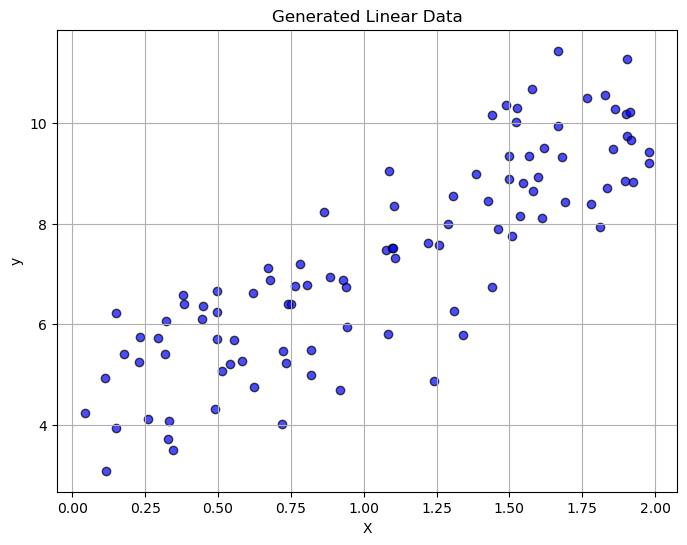

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', edgecolor='k', alpha=0.7)
plt.title("Generated Linear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()


Now let’s compute θ using the Normal Equation. We will use the inv() function from
NumPy’s linear algebra module (np.linalg) to compute the inverse of a matrix, and
the dot() method for matrix multiplication:

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)
print(X)
print(X_b)

[[4.08456091]
 [2.99792687]]
[[0.1769242 ]
 [1.50991004]
 [1.34197978]
 [0.72102872]
 [0.73352453]
 [1.28833045]
 [0.94013888]
 [1.66541868]
 [0.38126298]
 [0.94296938]
 [1.7804615 ]
 [1.58119384]
 [1.57871486]
 [1.43964417]
 [1.4873914 ]
 [1.8342417 ]
 [1.90192911]
 [0.31704128]
 [1.9029008 ]
 [1.07466382]
 [0.1484435 ]
 [1.3057504 ]
 [1.24262456]
 [1.4415756 ]
 [0.331303  ]
 [1.90063123]
 [1.52493602]
 [1.5985338 ]
 [0.622596  ]
 [1.69110626]
 [0.80414736]
 [0.49097811]
 [1.91728361]
 [1.53482359]
 [0.04396186]
 [0.67676825]
 [0.58343256]
 [1.86107346]
 [0.49620787]
 [1.61266608]
 [1.38541025]
 [0.22755908]
 [1.10376024]
 [1.4982517 ]
 [0.29390922]
 [0.25855471]
 [0.75075194]
 [0.72160193]
 [0.44823433]
 [1.2577497 ]
 [0.88542576]
 [1.80916092]
 [1.97788726]
 [0.32658045]
 [0.67234137]
 [1.8571248 ]
 [0.49737896]
 [0.92009982]
 [0.14929794]
 [0.76374526]
 [0.92893628]
 [0.619754  ]
 [0.34430009]
 [1.10601401]
 [1.91457267]
 [1.46132192]
 [1.67980159]
 [0.38152977]
 [1.97852389]
 [1.0

now we can make predctions using theta


In [3]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict)
print(X_new)
print(X_new_b)

[[ 4.08456091]
 [10.08041465]]
[[0]
 [2]]
[[1. 0.]
 [1. 2.]]


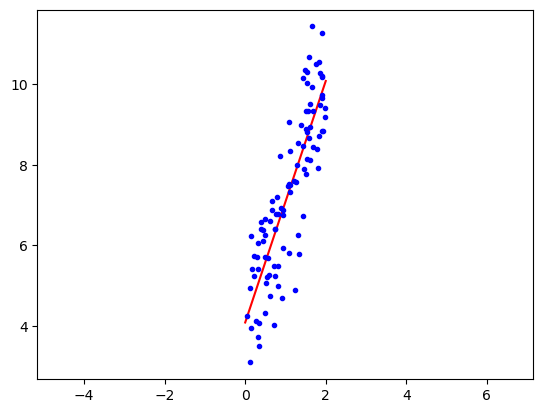

In [4]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.axis('equal')
plt.show()

In [5]:
#performing linear regresssion using scikit learn
from sklearn.linear_model import LinearRegression
lin_Reg = LinearRegression()
lin_Reg.fit(X,y)
print(lin_Reg.intercept_,lin_Reg.coef_)
print(lin_Reg.predict(X_new))

[4.08456091] [[2.99792687]]
[[ 4.08456091]
 [10.08041465]]


The LinearRegression class is based on the scipy.linalg.lstsq() function (the
name stands for “least squares”), which you could call directly

In [6]:
theta_best_svg,residue,ranks,s = np.linalg.lstsq(X_b,y)
theta_best_svg

array([[4.08456091],
       [2.99792687]])

In [7]:
np.linalg.pinv(X_b).dot(y)

array([[4.08456091],
       [2.99792687]])

it has n^2.4 to n^2 complexity 
So lets just use aother method called gradient descent method for next examples
Suppose you are lost in the mountains in a dense fog, and you can only feel the slope
of the ground below your feet. A good strategy to get to the bottom of the valley
quickly is to go downhill in the direction of the steepest slope. This is exactly what
Gradient Descent does: it measures the local gradient of the error function with
regard to the parameter vector θ, and it goes in the direction of descending gradient.
Once the gradient is zero, you have reached a minimum!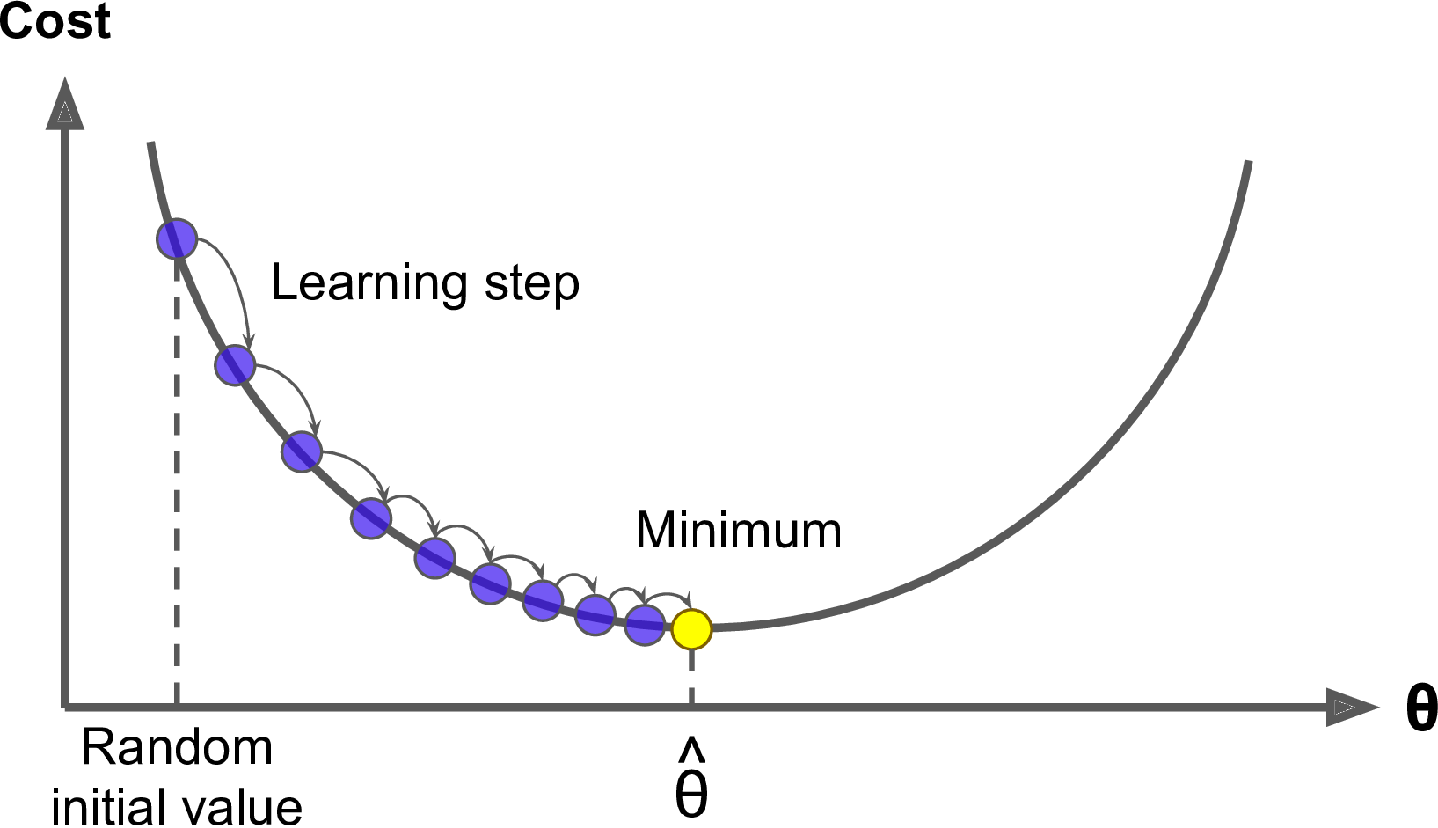
If the learning rate is too small, then the algorithm
will have to go through many iterations to converge, which will take a long time
On the other hand, if the learning rate is too high, you might jump across the valley
and end up on the other side, possibly even higher up than you were before. This
might make the algorithm diverge, with larger and larger values, failing to find a good
solution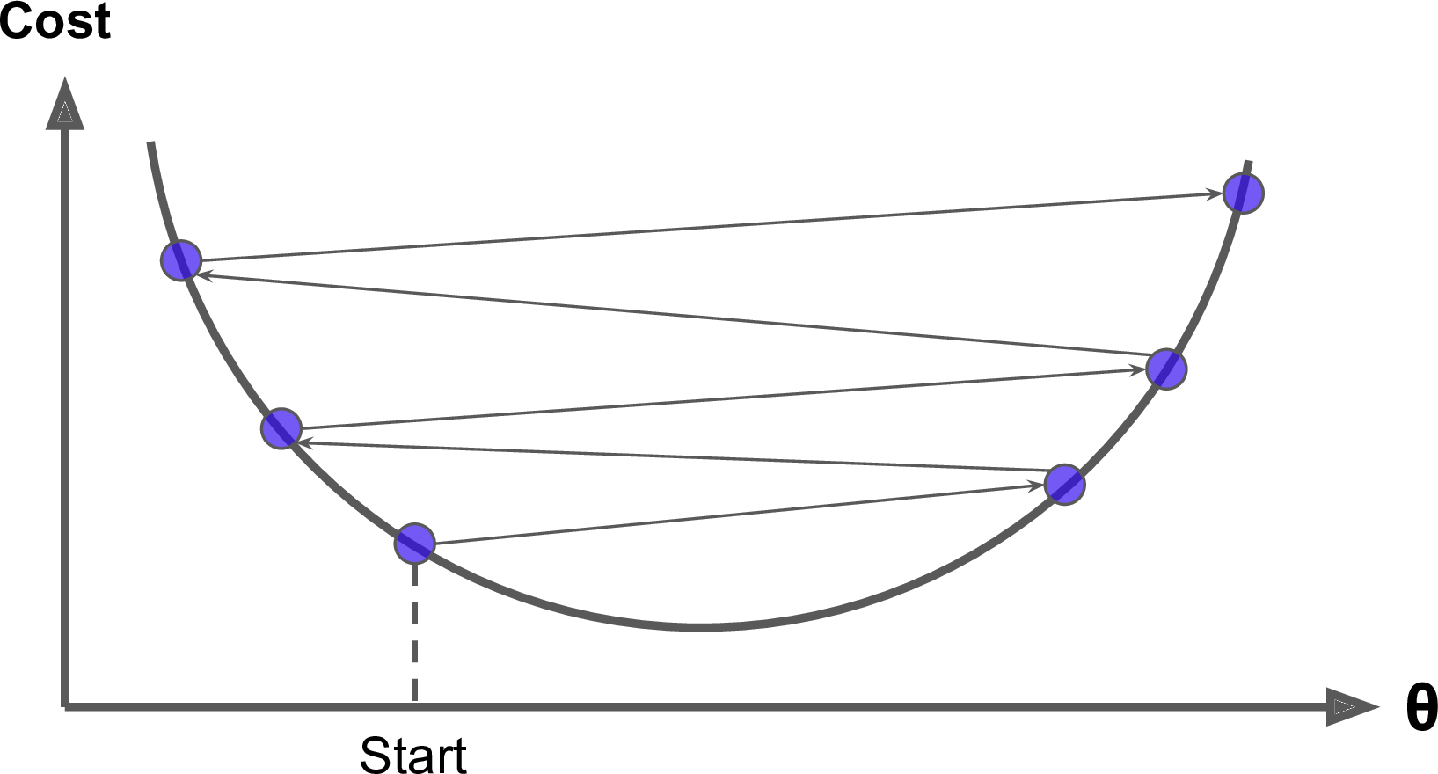
If the ran‐
dom initialization starts the algorithm on the left, then it will converge to a local
minimum, which is not as good as the global minimum. If it starts on the right, then it
will take a very long time to cross the plateau. And if you stop too early, you will
never reach the global minimum.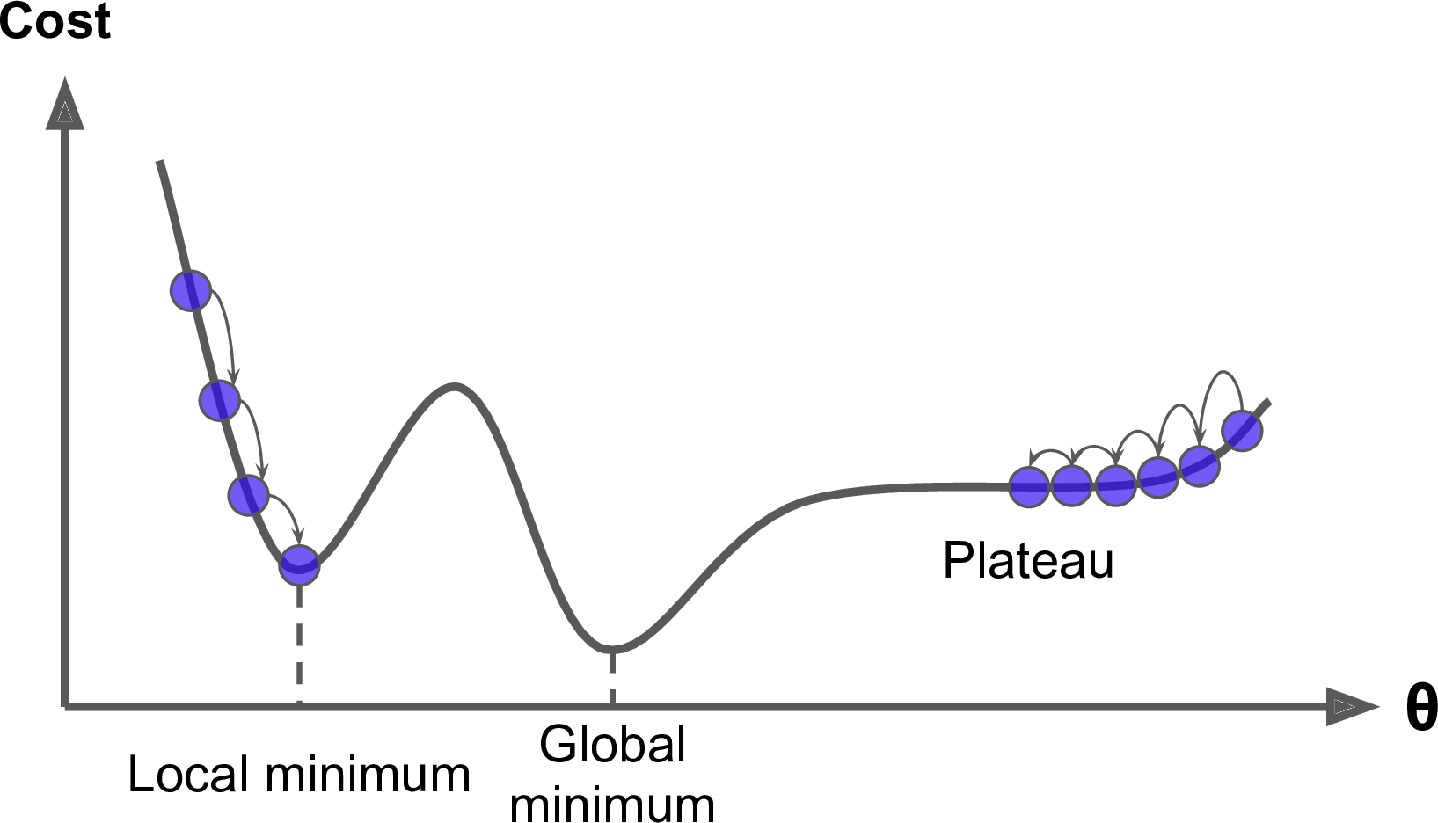
the MSE cost function for a Linear Regression model happens to be a
convex function, which means that if you pick any two points on the curve, the line
segment joining them never crosses the curve. This implies that there are no local
minima, just one global minimum.
To implement Gradient Descent, you need to compute the gradient of the cost func‐
tion with regard to each model parameter θj. In other words, you need to calculate
how much the cost function will change if you change θj just a little bit. This is called
a partial derivative. It is like asking “What is the slope of the mountain under my feet
if I face east?” and then asking the same question facing north (and so on for all other
dimensions, if you can imagine a universe with more than three dimensions).
Equation 4-5. Partial derivatives of the cost function
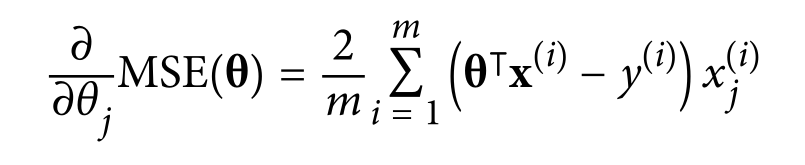
Instead of computing these partial derivatives individually, you can use Equation 4-6
to compute them all in one go. The gradient vector, noted ∇θMSE(θ), contains all the
partial derivatives of the cost function
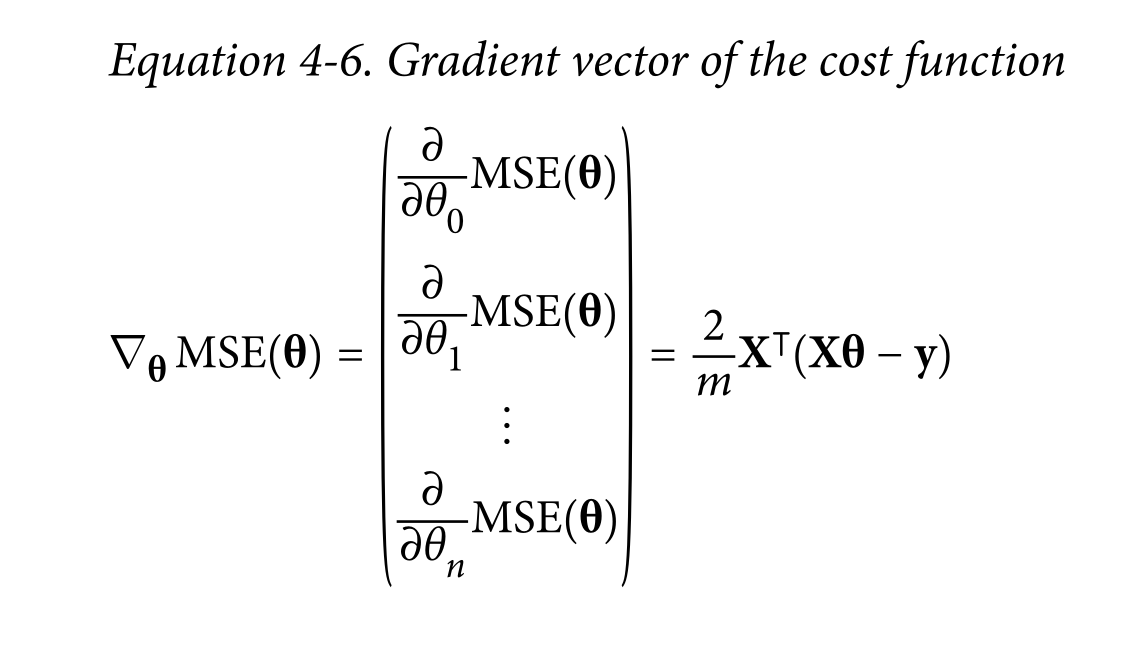
This is why the algorithm is
called Batch Gradient Descent: it uses the whole batch of training
data at every step (actually, Full Gradient Descent would probably
be a better name). As a result it is terribly slow on very large train‐
ing sets (but we will see much faster Gradient Descent algorithms
shortly).
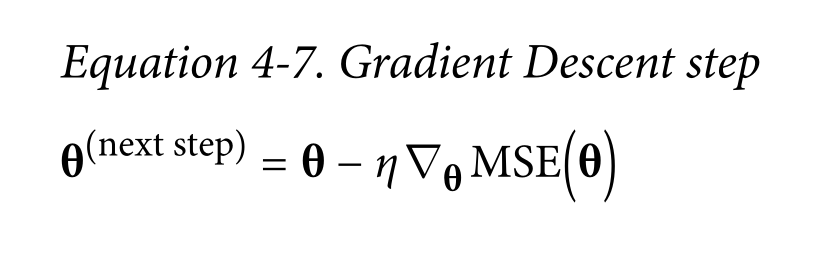
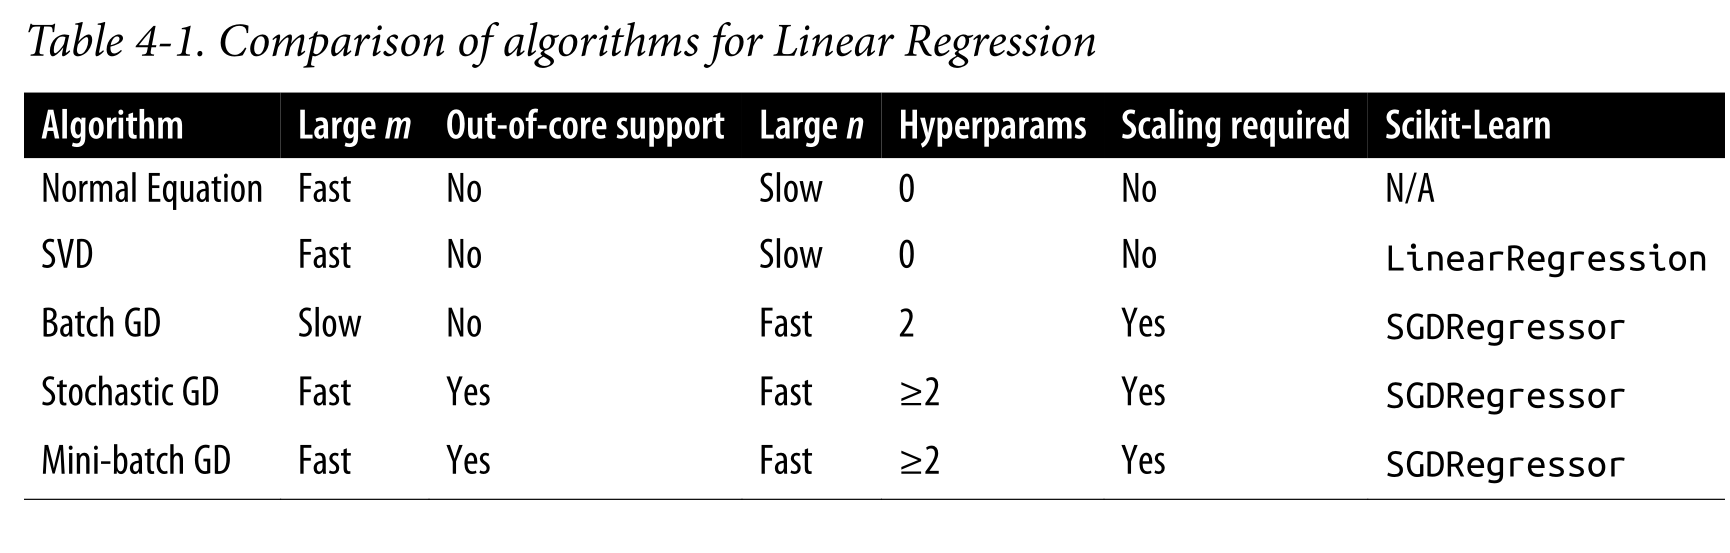

Optimized theta values (parameters):
 [[4.08456091]
 [2.99792687]]


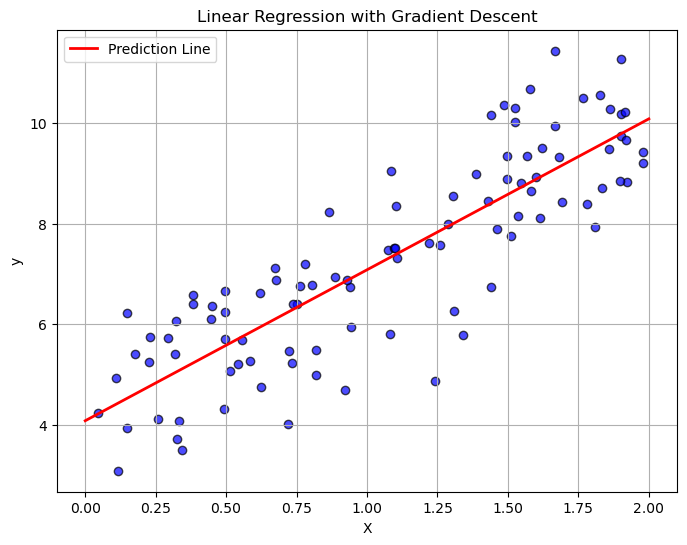

In [8]:


# Learning rate and number of iterations
eta = 0.1  # This is the learning rate
n_iterations = 1000  # Number of iterations for gradient descent
m = 100  # Number of training instances

# Random initialization of parameters (theta0 and theta1)
theta = np.random.randn(2, 1)

# Perform Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # Compute partial derivatives
    theta = theta - eta * gradients  # Update thetas using learning rate

print("Optimized theta values (parameters):\n", theta)

# Plot the training data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', edgecolor='k', alpha=0.7)

# Plot the regression line using learned parameters
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add bias term for prediction
y_predict = X_new_b.dot(theta)
plt.plot(X_new, y_predict, color='red', linewidth=2, label="Prediction Line")

plt.title("Linear Regression with Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Explanation (in comments):
# - eta: step size for each iteration (learning rate)
# - n_iterations: how many times we update theta
# - theta: our parameters (initially random)
# - We calculate the gradient of the cost function and update theta to reduce error
# - After training, we visualize both the original data and the fitted line

Stopped early at iteration 4302 due to small gradient norm.
Optimized theta values (parameters):
 [[4.08455815]
 [2.99792908]]


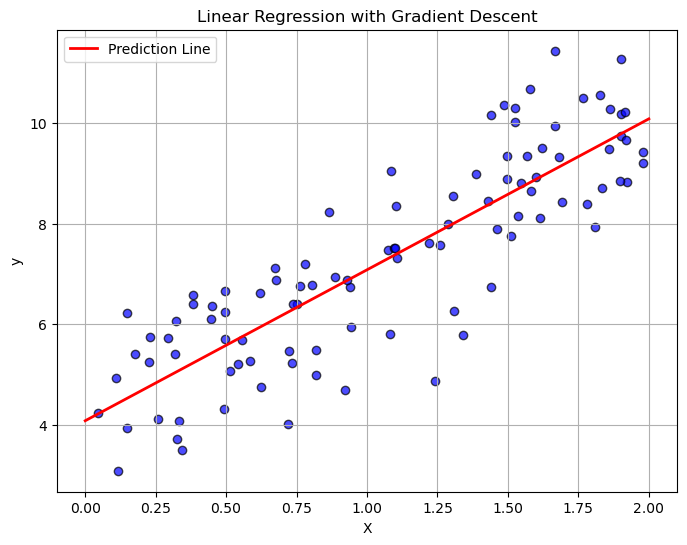

In [9]:
# Learning rate and max number of iterations
eta = 0.01  # This is the learning rate
n_iterations = 10000  # Maximum number of iterations
m = 100  # Number of training instances

# Tolerance for stopping (when gradient is tiny)
epsilon = 1e-6  # Small number to stop when updates are small

# Random initialization of parameters (theta0 and theta1)
theta = np.random.randn(2, 1)

# Perform Gradient Descent with early stopping
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # Compute partial derivatives
    if np.linalg.norm(gradients) < epsilon:
        print(f"Stopped early at iteration {iteration} due to small gradient norm.")
        break
    theta = theta - eta * gradients  # Update thetas using learning rate

print("Optimized theta values (parameters):\n", theta)

# Plot the training data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', edgecolor='k', alpha=0.7)

# Plot the regression line using learned parameters
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add bias term for prediction
y_predict = X_new_b.dot(theta)
plt.plot(X_new, y_predict, color='red', linewidth=2, label="Prediction Line")

plt.title("Linear Regression with Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Explanation (in comments):
# - eta: step size for each iteration (learning rate)
# - n_iterations: how many times we update theta (max)
# - epsilon: tolerance value; stops loop when gradient vector is very small
# - theta: our parameters (initially random)
# - We calculate the gradient of the cost function and update theta
# - Loop stops early if convergence is achieved (gradients are small)
# - After training, we visualize both the original data and the fitted line

Stochastic Gradient Descent
The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent picks a
random instance in the training set at every step and computes the gradients based
only on that single instance. Obviously, working on a single instance at a time makes
the algorithm much faster because it has very little data to manipulate at every itera‐
tion.

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on aver‐
age. Over time it will end up very close to the minimum, but once it gets there it will
continue to bounce around, never settling down (see Figure 4-9). So once the algo‐
rithm stops, the final parameter values are good, but not optimal.
When the cost function is very irregular (as in Figure 4-6), this can actually help the
algorithm jump out of local minima, so Stochastic Gradient Descent has a better
chance of finding the global minimum than Batch Gradient Descent does.
Therefore, randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum. One solution to this dilemma is
to gradually reduce the learning rate. The steps start out large (which helps make
quick progress and escape local minima), then get smaller and smaller, allowing the
algorithm to settle at the global minimum. This process is akin to simulated anneal‐
ing, an algorithm inspired from the process in metallurgy of annealing, where molten
metal is slowly cooled down. The function that determines the learning rate at each
iteration is called the learning schedule.
    If the learning rate is reduced too quickly, you
may get stuck in a local minimum, or even end up frozen halfway to the minimum. If
the learning rate is reduced too slowly, you may jump around the minimum for a
long time and end up with a suboptimal solution if you halt training too earl

In [10]:
# Define learning rate schedule
n_epochs = 50
m = 100  # number of instances
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

# Random initialization of theta
theta = np.random.randn(2, 1)

# Perform Stochastic Gradient Descent (SGD)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print("Optimized theta (SGD with learning schedule):\n", theta)

Optimized theta (SGD with learning schedule):
 [[4.00475865]
 [3.06665219]]


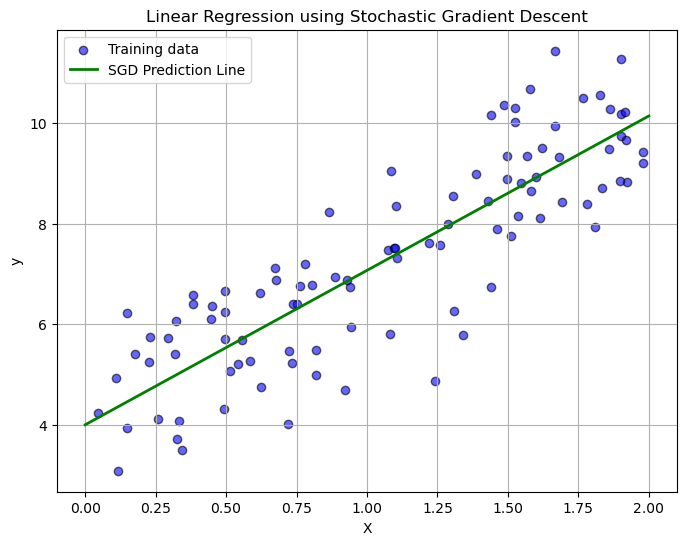

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', edgecolor='k', alpha=0.6, label="Training data")
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)
plt.plot(X_new, y_predict, color='green', linewidth=2, label="SGD Prediction Line")

plt.title("Linear Regression using Stochastic Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

To perform Linear Regression using Stochastic GD with Scikit-Learn, you can use the
SGDRegressor class, which defaults to optimizing the squared error cost function.

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())


SGDRegressor(eta0=0.1, penalty=None)

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.037821]), array([2.95508705]))

What if your data is more complex than a straight line? Surprisingly, you can use a
linear model to fit nonlinear data. A simple way to do this is to add powers of each
feature as new features, then train a linear model on this extended set of features. This
technique is called Polynomial Regression.
Let’s look at an example. First, let’s generate some nonlinear data, based on a simple
quadratic equation7 (plus some noise; see Figure 4-12)

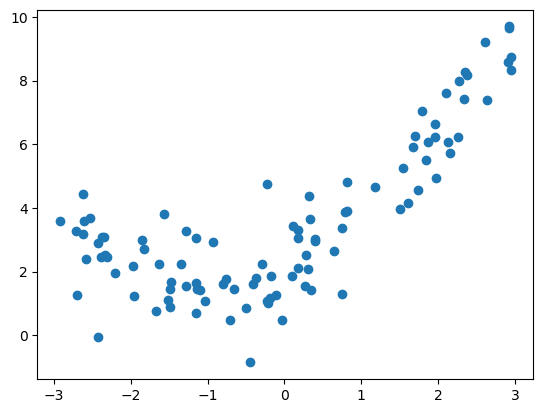

In [14]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X,y)

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
nomialFeatures class to transform our training data, adding the square (second-
degree polynomial) of each feature in the training set as a new feature (in this case
there is just one feature):

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2,include_bias = False)
x_poly = poly_features.fit_transform(X)
print(X[0])
print(x_poly[0])

[-1.14514131]
[-1.14514131  1.31134863]


X_poly now contains the original feature of X plus the square of this feature. Now you
can fit a LinearRegression model to this extended training data (Figure 4-13):

X_poly now contains the original feature of X plus the square of this feature. Now you
can fit a LinearRegression model to this extended training data (Figure 4-13):

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.16578266]), array([[1.01802348, 0.4961794 ]]))

The Equation of the curve is:
y = 2.17 + 1.02*x + 0.50*x^2


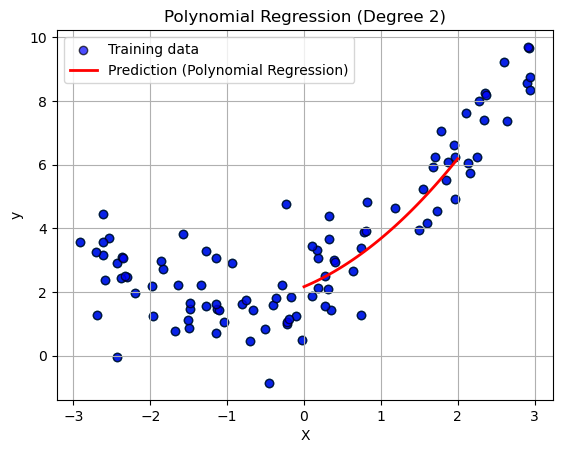

In [17]:
plt.scatter(X,y)
X_plot = np.linspace(0, 2, 100).reshape(100, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = lin_reg.predict(X_plot_poly)

plt.scatter(X, y, label="Training data", color='blue', edgecolor='k', alpha=0.7)
plt.plot(X_plot, y_plot, label="Prediction (Polynomial Regression)", color='red', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.grid(True)
intercept = lin_reg.intercept_[0]
coef = lin_reg.coef_[0]

print("The Equation of the curve is:")
print(f"y = {intercept:.2f} + {coef[0]:.2f}*x + {coef[1]:.2f}*x^2")

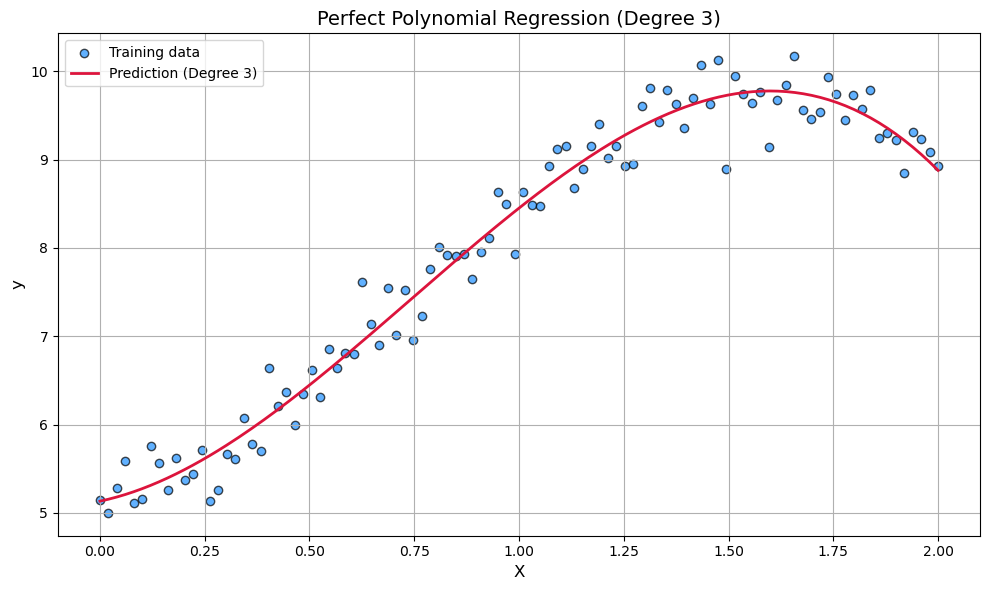

The Equation of the curve is:
y = 5.133 + 0.997*x^1 + 4.203*x^2 - 1.883*x^3


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Seed for reproducibility
np.random.seed(42)

# Step 1: Generate clean cubic data with small noise
X = np.linspace(0, 2, 100).reshape(-1, 1)
true_y = 5 + 2*X + 3*X**2 - 1.5*X**3
noise = np.random.randn(100, 1) * 0.3  # small noise
y = true_y + noise

# Step 2: Create polynomial features up to degree 3
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Step 3: Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Predict using smooth inputs
X_test = np.linspace(0, 2, 200).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Training data", color='dodgerblue', edgecolor='k', alpha=0.7)
plt.plot(X_test, y_pred, label="Prediction (Degree 3)", color='crimson', linewidth=2)
plt.xlabel("X", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Perfect Polynomial Regression (Degree 3)", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Print the equation
intercept = model.intercept_[0]
coef = model.coef_[0]

equation = f"y = {intercept:.3f}"
for power, c in enumerate(coef, start=1):
    sign = " + " if c >= 0 else " - "
    equation += f"{sign}{abs(c):.3f}*x^{power}"

print("The Equation of the curve is:")
print(equation)


In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curve(model, X, y):
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    train_errors, test_errors = [], []

    # Loop over increasing sizes of training set
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])

        y_train_predict = model.predict(x_train[:m])
        y_test_predict = model.predict(x_test)

        train_mse = mean_squared_error(y_train[:m], y_train_predict)
        test_mse = mean_squared_error(y_test, y_test_predict)

        train_errors.append(train_mse)
        test_errors.append(test_mse)

    # Plotting
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train RMSE")
    plt.plot(np.sqrt(test_errors), "b--", linewidth=1, label="Test RMSE")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.title("Learning Curve")
    plt.grid(True)
    plt.show()

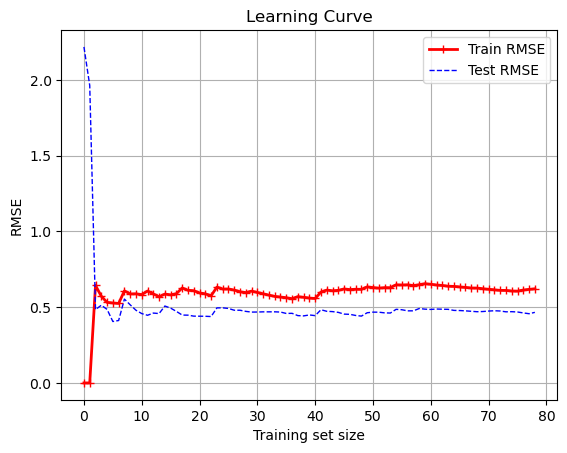

In [27]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

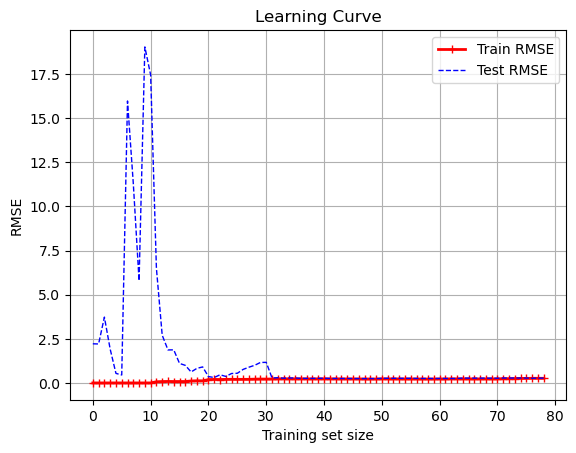

In [29]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curve(polynomial_regression, X, y)

In [ ]:
Ridge Regression (also called Tikhonov regularization) is a regularized version of Lin‐
ear Regression: a regularization term equal to α∑ni = 1 θi2 is added to the cost function.This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible.tion 4-8 presents the Ridge Regression cost function.9
Equation 4-8. Ridge Regression cost function
1
J θ = MSE θ + α 2 ∑ni = 1 θi2
